# 1. Consider three different periods, i.e., the entire record, first half of the record and second half of the record

# 2. Choose a few summary measures and then calculate the statistics for the mentioned periods in bullet 2 (mean, median, mode, sd, kurtosis, skewness)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the csv file
df=pd.read_csv('IMD_QuarterDegree_DailyRainfall_1850_7875 (1).csv')
df

,DateTime,18.5 78.75
0,1950-01-01,0.0
1,1950-01-02,0.0
2,1950-01-03,0.0
3,1950-01-04,0.0
4,1950-01-05,0.0
...,...,...
26293,2021-12-27,0.0
26294,2021-12-28,0.0
26295,2021-12-29,0.0
26296,2021-12-30,0.0


In [3]:
#datetime format
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Year']=pd.to_datetime(df['DateTime']).dt.year
df['Month']=pd.to_datetime(df['DateTime']).dt.month
df['Day']=pd.to_datetime(df['DateTime']).dt.day
df['Rainfall']=df['18.5 78.75']
df.drop(columns=['18.5 78.75'],inplace=True) #drop the column from dataframe
df

,DateTime,Year,Month,Day,Rainfall
0,1950-01-01,1950,1,1,0.0
1,1950-01-02,1950,1,2,0.0
2,1950-01-03,1950,1,3,0.0
3,1950-01-04,1950,1,4,0.0
4,1950-01-05,1950,1,5,0.0
...,...,...,...,...,...
26293,2021-12-27,2021,12,27,0.0
26294,2021-12-28,2021,12,28,0.0
26295,2021-12-29,2021,12,29,0.0
26296,2021-12-30,2021,12,30,0.0


In [4]:
#first half of dataframe
df_1=df.iloc[:(26298//2)]
df_1

,DateTime,Year,Month,Day,Rainfall
0,1950-01-01,1950,1,1,0.0
1,1950-01-02,1950,1,2,0.0
2,1950-01-03,1950,1,3,0.0
3,1950-01-04,1950,1,4,0.0
4,1950-01-05,1950,1,5,0.0
...,...,...,...,...,...
13144,1985-12-27,1985,12,27,0.0
13145,1985-12-28,1985,12,28,0.0
13146,1985-12-29,1985,12,29,0.0
13147,1985-12-30,1985,12,30,0.0


In [5]:
#first half of dataframe
df_2=df.iloc[(26298//2):]
df_2

,DateTime,Year,Month,Day,Rainfall
13149,1986-01-01,1986,1,1,0.0
13150,1986-01-02,1986,1,2,0.0
13151,1986-01-03,1986,1,3,0.0
13152,1986-01-04,1986,1,4,0.0
13153,1986-01-05,1986,1,5,0.0
...,...,...,...,...,...
26293,2021-12-27,2021,12,27,0.0
26294,2021-12-28,2021,12,28,0.0
26295,2021-12-29,2021,12,29,0.0
26296,2021-12-30,2021,12,30,0.0


In [6]:
#Choose a few summary measures and then 
#calculate the statistics for the mentioned periods in bullet 2 (mean, median, mode, sd, kurtosis, skewness)
def statsfun(df_x,column):
    mean=column.mean()  #mean calculation
    median=column.median()  #median calculation
    mode=column.mode()  #mode calculation
    std_v=column.std()  #stadard deviation calculation
    kurtosis_=column.kurtosis()  #kurtosis calculation
    skew_=column.skew()  #skewness calculation
    summary_measures=pd.DataFrame({'Mean': mean,'Median':median,'Mode':mode,'Std_dev':std_v,'Kurtosis':kurtosis_,'Skewness':skew_},index=['values'])
    return summary_measures

In [7]:
summary_measure1=statsfun(df,df['Rainfall'])
summary_measure2=statsfun(df_1,df_1['Rainfall'])
summary_measure3=statsfun(df_2,df_2['Rainfall'])

In [8]:
summary_measure1

,Mean,Median,Mode,Std_dev,Kurtosis,Skewness
values,2.534539,0.0,NaN,8.242267,84.849568,7.076355


In [9]:
summary_measure2

,Mean,Median,Mode,Std_dev,Kurtosis,Skewness
values,2.387893,0.0,NaN,7.341072,54.952266,5.955015


In [10]:
summary_measure3

,Mean,Median,Mode,Std_dev,Kurtosis,Skewness
values,2.681184,0.0,NaN,9.052113,92.451197,7.492252


# Iterpretation

# 3. Plot time series plots for daily, monthly, seasonal and yearly total rainfall for the selected grid 

###Time series plot will have time on the x-axis and value on the y axis.

###Lines and dots overlaid in the same plot

In [11]:
#daily total rainfall
daily_total=df.groupby('Day')['Rainfall'].sum()
daily_total=pd.DataFrame({'Day':daily_total.index,'Daily Total':daily_total.values})
daily_total.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Day,1.0000,2.0000,3.0000,4.0000,5.0000,6.000,7.0000,8.0000,9.0000,10.0000,...,22.0000,23.0000,24.0000,25.000,26.0000,27.0000,28.0000,29.0000,30.000,31.0000
Daily Total,2004.1229,2206.4253,2158.2479,2467.2209,2344.4166,1982.204,2190.5208,1971.5082,1782.6024,2227.1688,...,2259.1094,2478.4092,2292.7653,2205.229,2037.3406,2115.6758,2189.1571,2003.4688,1957.175,1362.5219


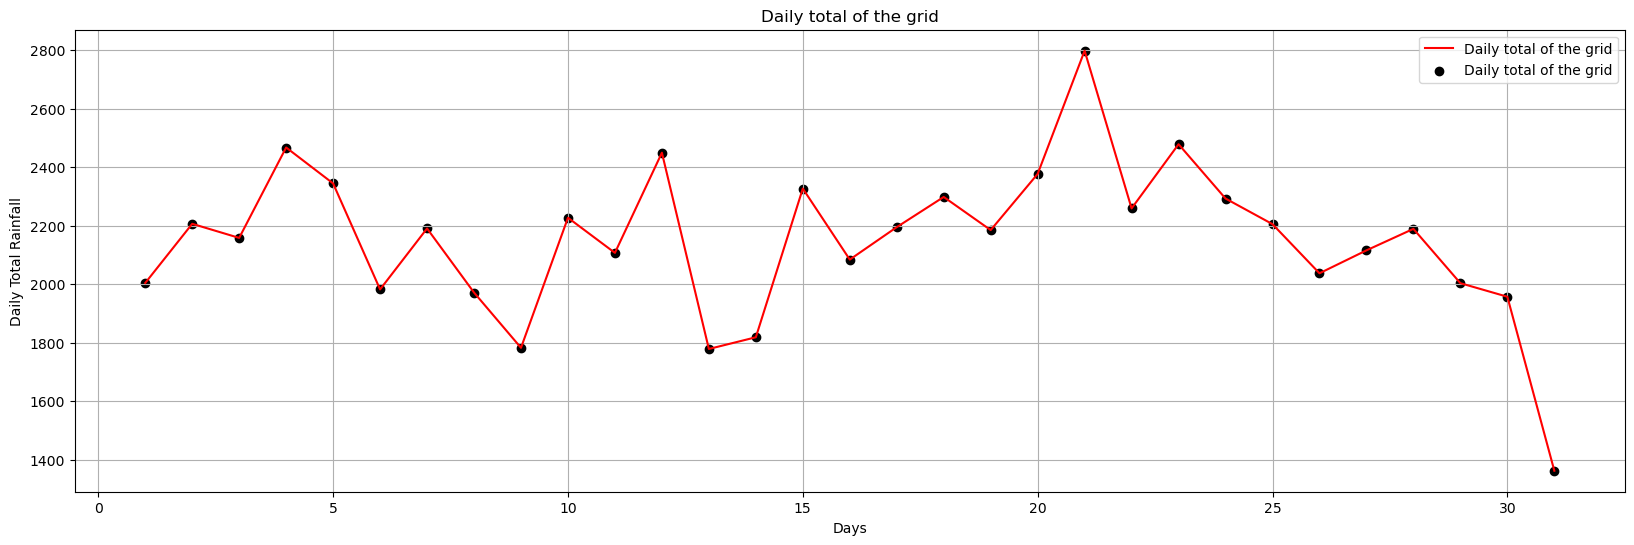

In [12]:
# plot daily total rainfall
plt.figure(figsize=(20,6))

plt.plot(daily_total['Day'],daily_total['Daily Total'],color='red',label='Daily total of the grid')
plt.scatter(daily_total['Day'],daily_total['Daily Total'],color='black',label='Daily total of the grid')

plt.xlabel('Days')
plt.ylabel('Daily Total Rainfall')
plt.title('Daily total of the grid')

plt.grid()
plt.legend()

plt.show()

In [13]:
#monthly total rainfall
monthly_total=df.groupby('Month')['Rainfall'].sum()
monthly_total=pd.DataFrame({'Month':monthly_total.index,'Monthly Total':monthly_total.values})
monthly_total.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
Month,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.000,10.0000,11.0000,12.0000
Monthly Total,794.8133,525.4688,1019.3932,1250.8032,1595.2161,10337.6654,16771.0971,14638.9958,12282.883,5795.8832,1333.4754,307.6096


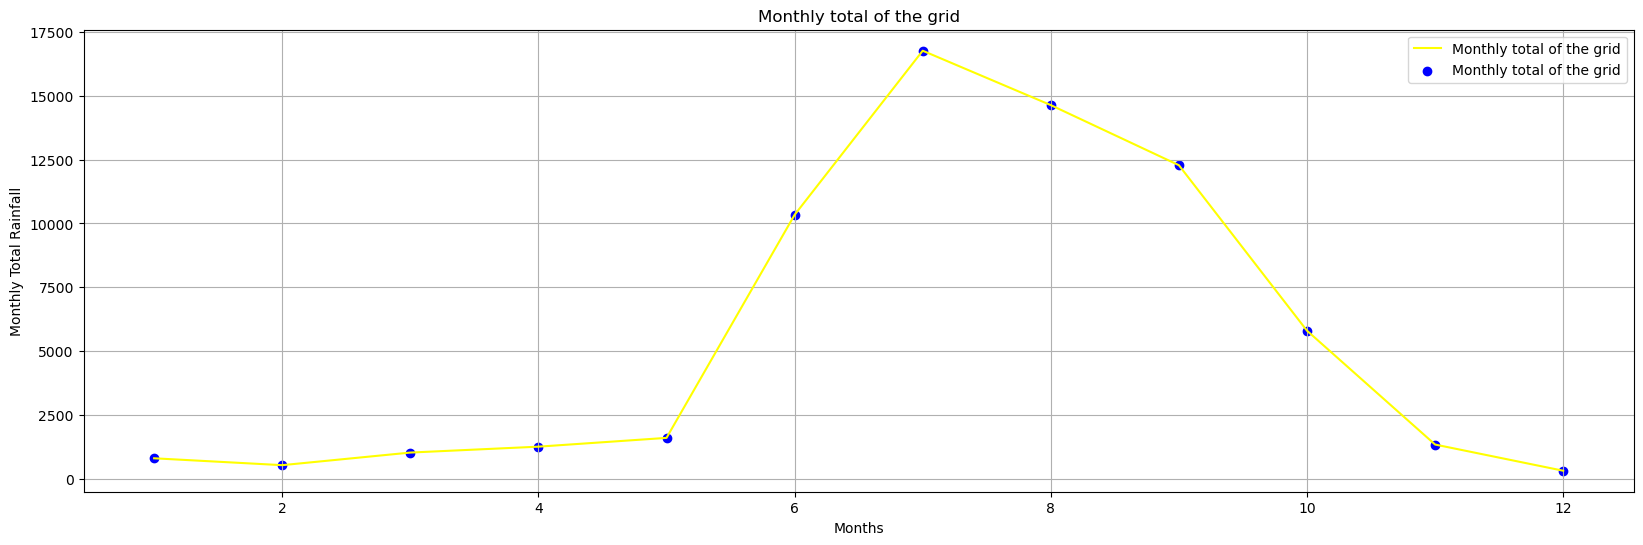

In [14]:
# plot monthly total rainfall
plt.figure(figsize=(20,6))

plt.plot(monthly_total['Month'],monthly_total['Monthly Total'],color='yellow',label='Monthly total of the grid')
plt.scatter(monthly_total['Month'],monthly_total['Monthly Total'],color='blue',label='Monthly total of the grid')

plt.xlabel('Months')
plt.ylabel('Monthly Total Rainfall')
plt.title('Monthly total of the grid')

plt.grid()
plt.legend()

plt.show()

In [15]:
#yearly total rainfall
yearly_total=df.groupby('Year')['Rainfall'].sum()
yearly_total=pd.DataFrame({'Year':yearly_total.index,'Yearly Total':yearly_total.values})
yearly_total.transpose()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Year,1950.0000,1951.0000,1952.0000,1953.0000,1954.0000,1955.0000,1956.0000,1957.0000,1958.0000,1959.0000,...,2012.0000,2013.0000,2014.0000,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000,2020.000,2021.0000
Yearly Total,739.2409,774.8301,692.3336,1146.3654,749.4556,1155.3746,1275.9798,947.7056,860.2354,871.5037,...,833.3701,1272.0209,629.0221,866.7888,1154.3627,826.1411,722.3418,1269.5527,1451.109,1547.6615


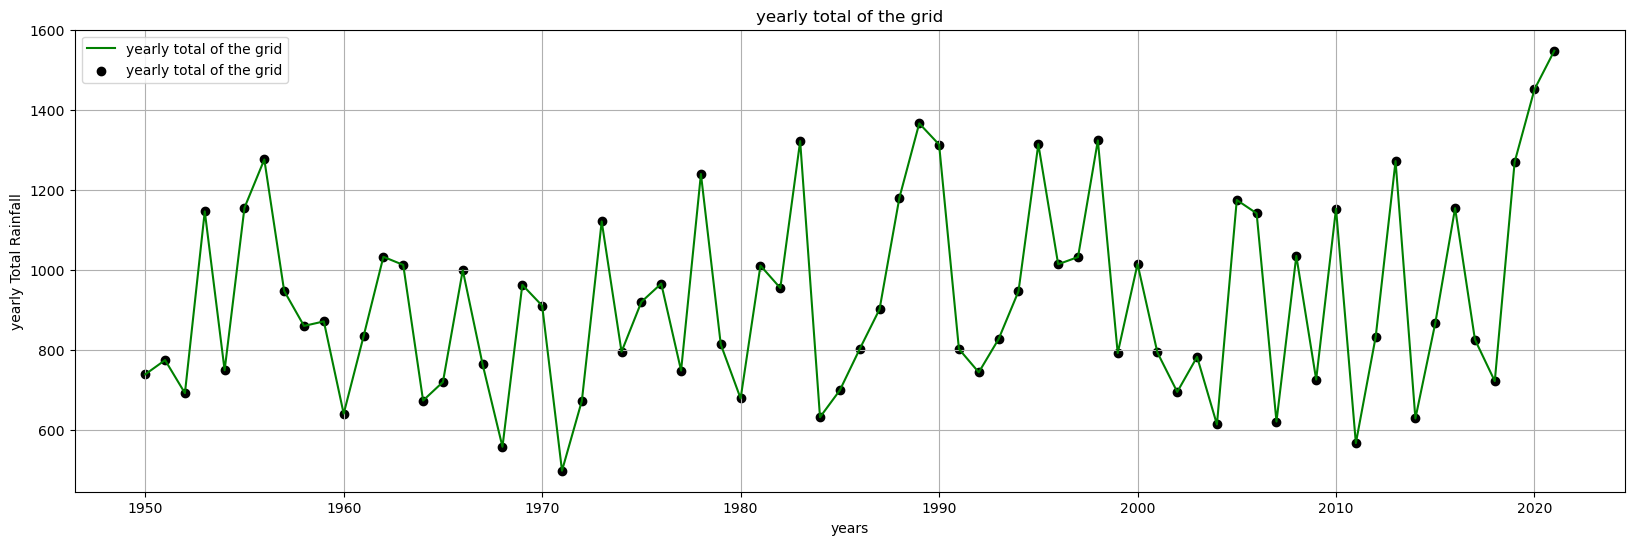

In [16]:
# plot yearly total rainfall
plt.figure(figsize=(20,6))

plt.plot(yearly_total['Year'],yearly_total['Yearly Total'],color='green',label='yearly total of the grid')
plt.scatter(yearly_total['Year'],yearly_total['Yearly Total'],color='black',label='yearly total of the grid')

plt.xlabel('years')
plt.ylabel('yearly Total Rainfall')
plt.title('yearly total of the grid')

plt.grid()
plt.legend()

plt.show()

# 4. Calculate annual daily maximum and second highest maximum, and then develop the time series plot.  Comment on the values and then differences.

In [17]:
# annual daily maximum
annual_dailymax=df.groupby('Year')['Rainfall'].max()
annual_dailymax=pd.DataFrame({'Year':annual_dailymax.index,'Annual Daily Maximum':annual_dailymax.values})
annual_dailymax

,Year,Annual Daily Maximum
0,1950,101.0616
1,1951,38.3646
2,1952,51.9216
3,1953,61.7978
4,1954,43.2476
...,...,...
67,2017,47.3704
68,2018,115.0168
69,2019,73.8024
70,2020,80.0455


In [18]:
#function to get the second maximum data from season series
def second_maximum(series):
    sorted_series=series.sort_values(ascending=False)
    return sorted_series.iloc[1]

In [19]:
# annual daily second maximum
annual_daily2max=df.groupby('Year')['Rainfall'].apply(second_maximum)
annual_daily2max=pd.DataFrame({'Year':annual_daily2max.index,'Annual Daily second Maximum':annual_daily2max.values})
annual_daily2max

,Year,Annual Daily second Maximum
0,1950,56.8558
1,1951,32.5601
2,1952,45.9720
3,1953,60.0159
4,1954,37.6613
...,...,...
67,2017,46.8140
68,2018,58.8544
69,2019,71.8866
70,2020,75.9620


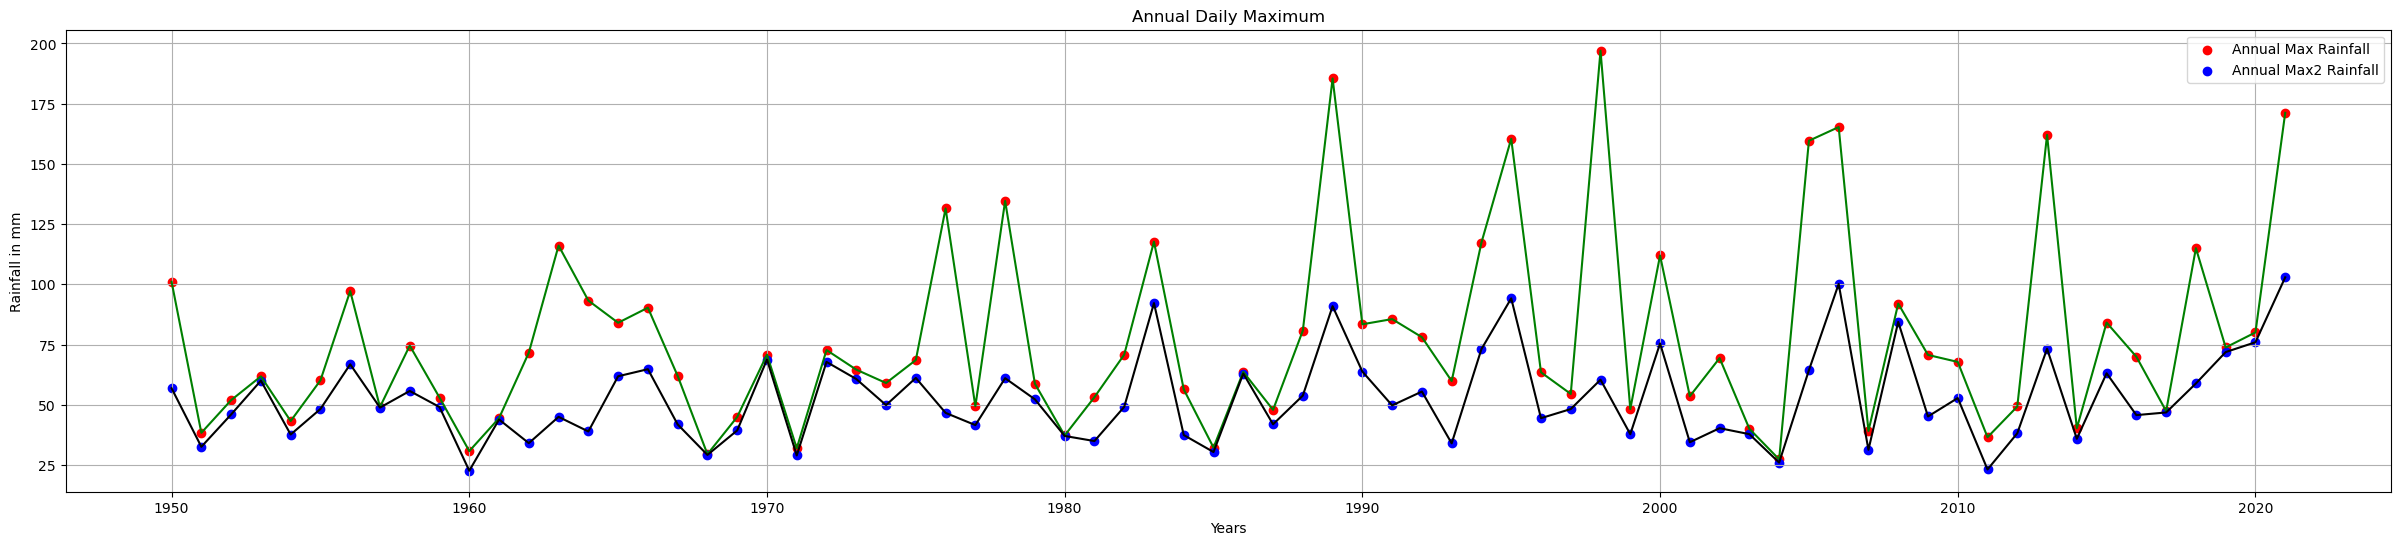

In [20]:
# Plot annual daily maximum and second annual daily maximum
plt.figure(figsize=(30,6))
plt.scatter(annual_dailymax['Year'], annual_dailymax['Annual Daily Maximum'],color='red', label='Annual Max Rainfall')
plt.plot(annual_dailymax['Year'], annual_dailymax['Annual Daily Maximum'], color='green')

plt.scatter(annual_daily2max['Year'], annual_daily2max['Annual Daily second Maximum'], color='blue', label='Annual Max2 Rainfall')
plt.plot(annual_daily2max['Year'], annual_daily2max['Annual Daily second Maximum'], color='black')

plt.xlabel('Years')
plt.ylabel('Rainfall in mm')
plt.title('Annual Daily Maximum')
plt.legend()  
plt.grid()  
plt.show()

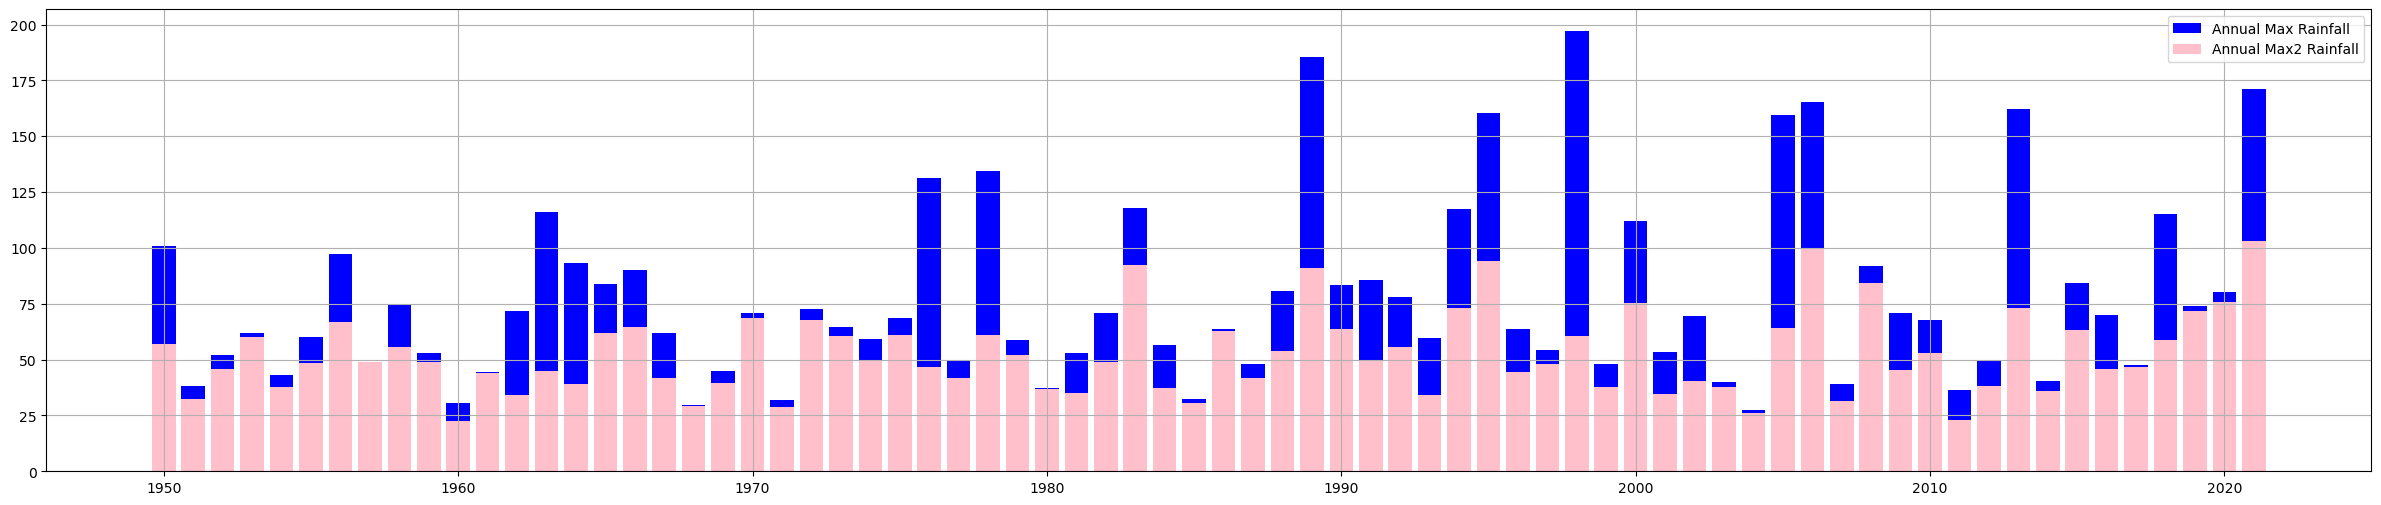

In [21]:
plt.figure(figsize=(30,6))
plt.bar(annual_dailymax['Year'], annual_dailymax['Annual Daily Maximum'], color='blue', label='Annual Max Rainfall')
plt.bar(annual_daily2max['Year'], annual_daily2max['Annual Daily second Maximum'], color='pink',label='Annual Max2 Rainfall')
plt.grid()
plt.legend()
plt.show()

# 5. Calculate probability of rainfall on any given day for each year and then plot probabilities for all years

In [22]:
#probability of rainfall on any given day in a year for 0,1.25,2.54 cm
def rainyday_cm(cm):
    no_rainydays=df[df['Rainfall']>cm].groupby('Year').size() #count() won't be used as it will not be 1-dimensional
    probability=no_rainydays/df.groupby('Year')['Rainfall'].size()
    probability=pd.DataFrame({'Year':probability.index,'Rainy_days':no_rainydays.values,'Probability':probability.values})
    return probability

In [23]:
probability1=rainyday_cm(0)
probability2=rainyday_cm(1.25)
probability3=rainyday_cm(2.54)

In [24]:
probability1

,Year,Rainy_days,Probability
0,1950,94,0.257534
1,1951,113,0.309589
2,1952,103,0.281421
3,1953,113,0.309589
4,1954,103,0.282192
...,...,...,...
67,2017,82,0.224658
68,2018,74,0.202740
69,2019,112,0.306849
70,2020,109,0.297814


In [25]:
probability2

,Year,Rainy_days,Probability
0,1950,68,0.186301
1,1951,78,0.213699
2,1952,71,0.193989
3,1953,89,0.243836
4,1954,70,0.191781
...,...,...,...
67,2017,64,0.175342
68,2018,53,0.145205
69,2019,89,0.243836
70,2020,86,0.234973


In [26]:
probability3

,Year,Rainy_days,Probability
0,1950,51,0.139726
1,1951,55,0.150685
2,1952,61,0.166667
3,1953,81,0.221918
4,1954,63,0.172603
...,...,...,...
67,2017,49,0.134247
68,2018,44,0.120548
69,2019,77,0.210959
70,2020,72,0.196721


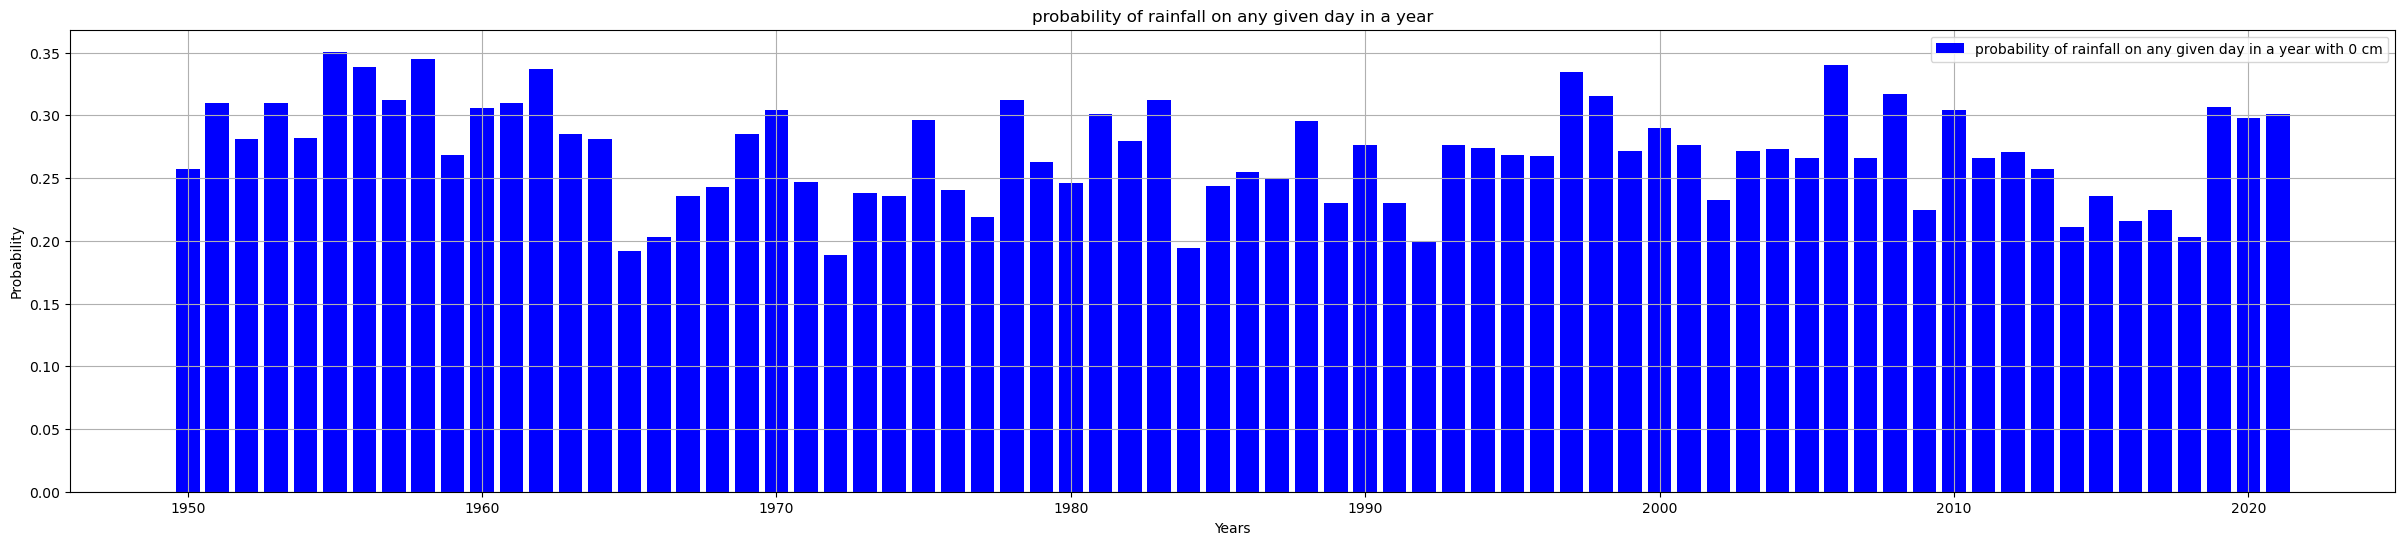

In [27]:
# plot of probability of all years, 0 cm
plt.figure(figsize=(30,6))
plt.bar(probability1['Year'],probability1['Probability'],color='blue',label='probability of rainfall on any given day in a year with 0 cm')
plt.xlabel('Years')
plt.ylabel('Probability')
plt.title('probability of rainfall on any given day in a year')
plt.legend()  
plt.grid()  
plt.show()

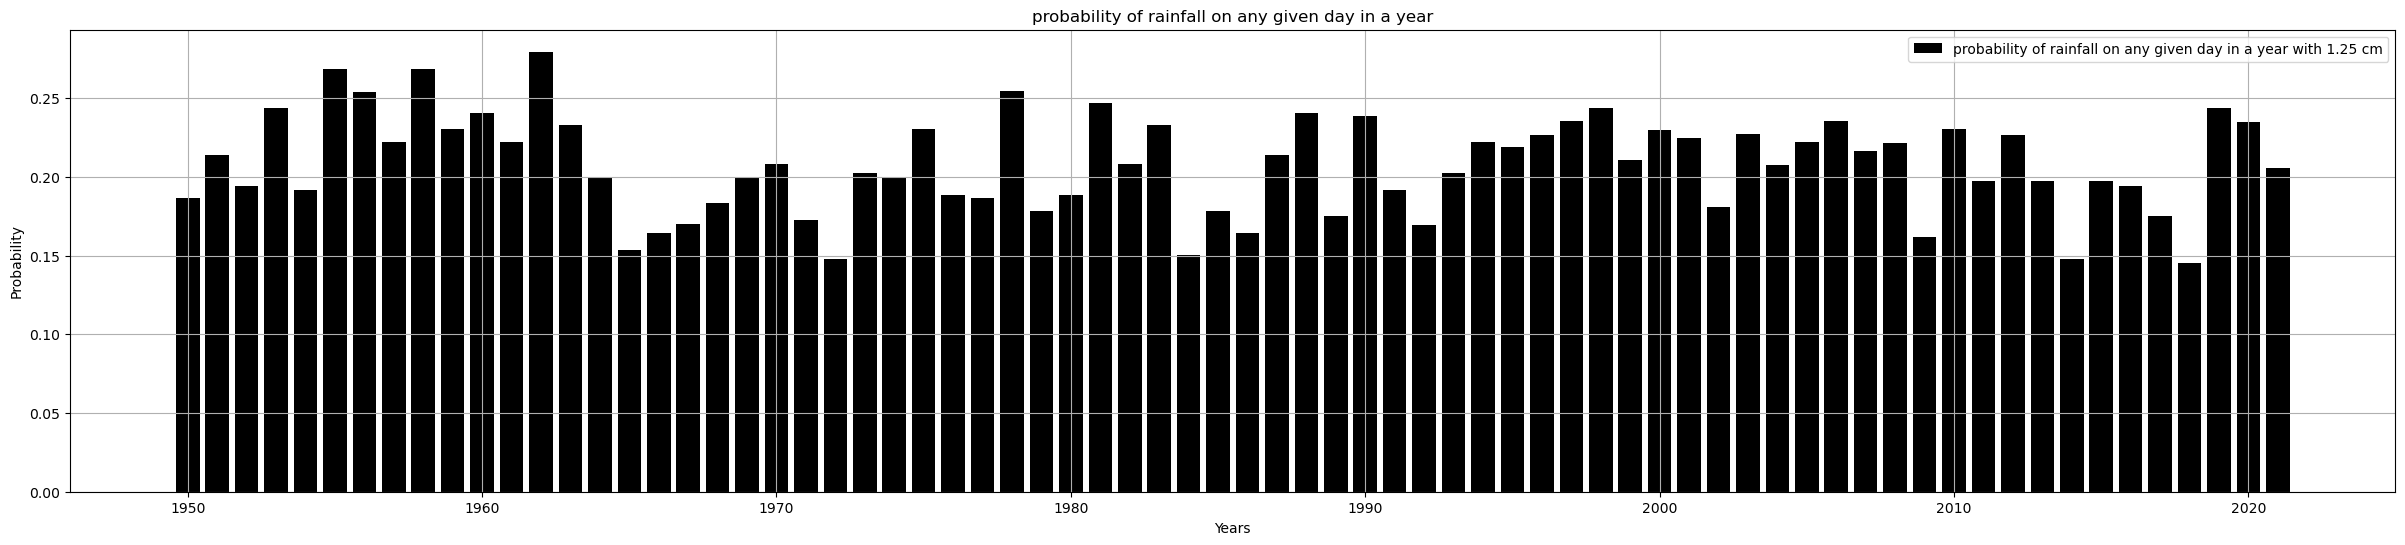

In [28]:
# plot of probability of all years, 1.25 cm
plt.figure(figsize=(30,6))
plt.bar(probability2['Year'],probability2['Probability'],color='black',label='probability of rainfall on any given day in a year with 1.25 cm')
plt.xlabel('Years')
plt.ylabel('Probability')
plt.title('probability of rainfall on any given day in a year')
plt.legend()  
plt.grid()  
plt.show()

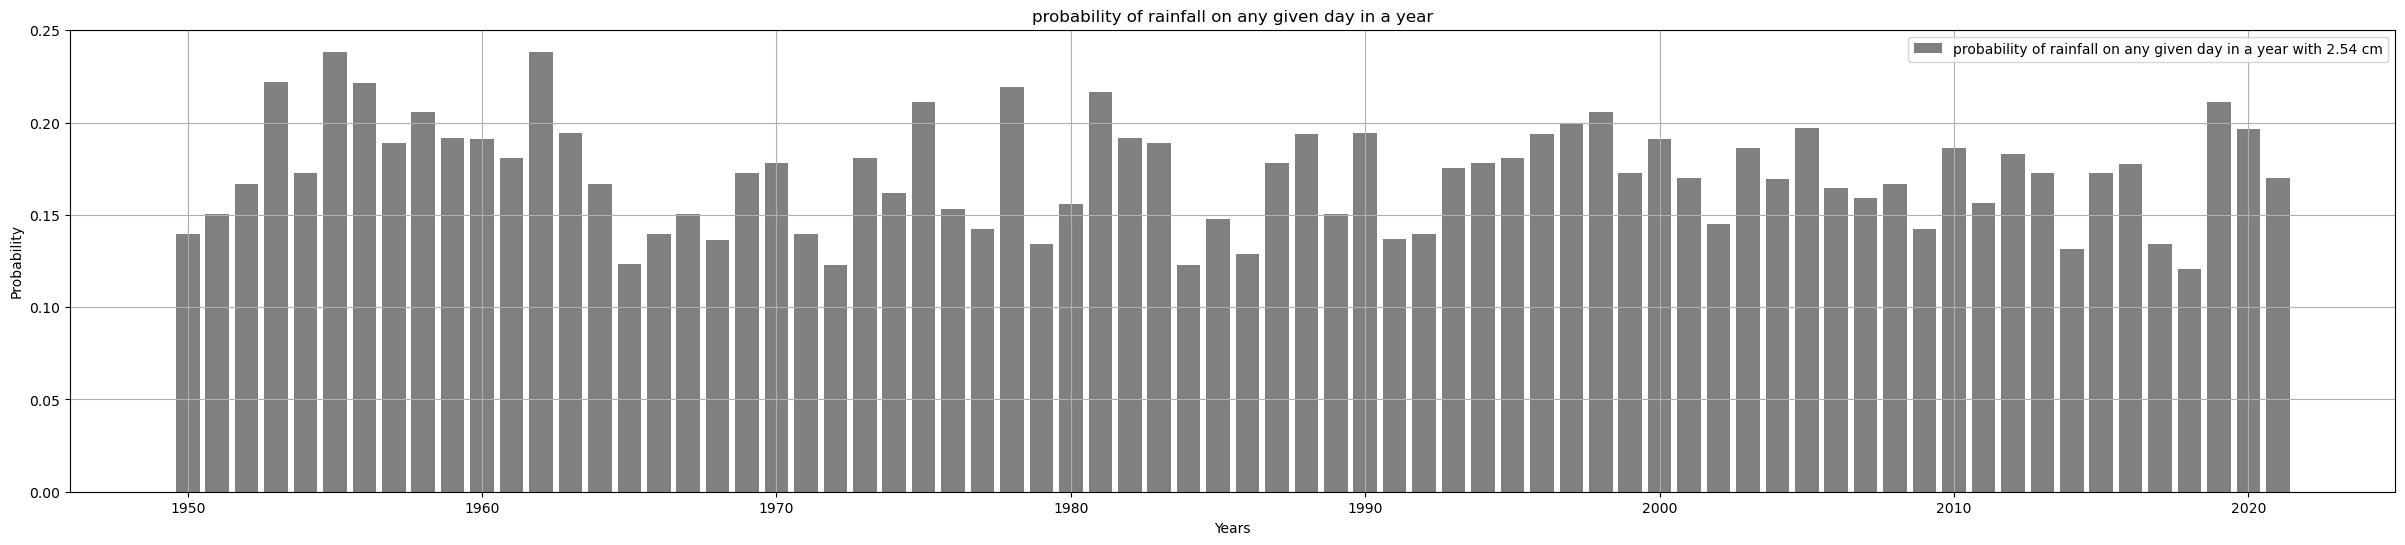

In [29]:
# plot of probability of all years,2.54 cm
plt.figure(figsize=(30,6))
plt.bar(probability3['Year'],probability3['Probability'],color='grey',label='probability of rainfall on any given day in a year with 2.54 cm')
plt.xlabel('Years')
plt.ylabel('Probability')
plt.title('probability of rainfall on any given day in a year')
plt.legend()  
plt.grid()  
plt.show()

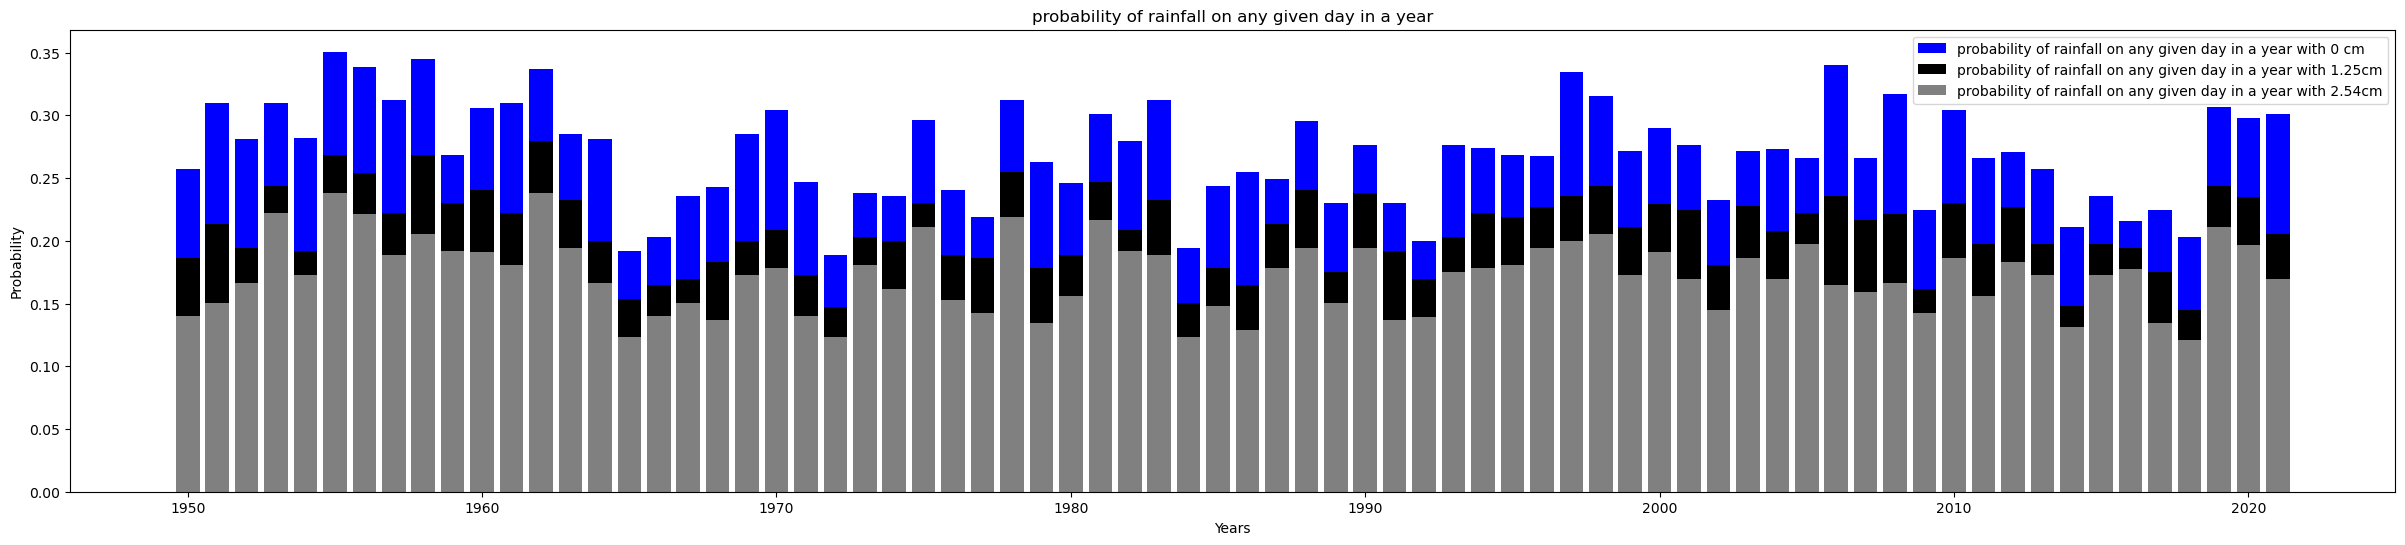

In [30]:
# plot of probability of all years with 0,1.25, 2.54cm
plt.figure(figsize=(30,6))
plt.bar(probability1['Year'],probability1['Probability'],color='blue',label='probability of rainfall on any given day in a year with 0 cm')
plt.bar(probability2['Year'],probability2['Probability'],color='black',label='probability of rainfall on any given day in a year with 1.25cm')
plt.bar(probability3['Year'],probability3['Probability'],color='grey',label='probability of rainfall on any given day in a year with 2.54cm')

plt.xlabel('Years')
plt.ylabel('Probability')
plt.title('probability of rainfall on any given day in a year')
plt.legend()  
plt.show()

# 6. Calculate the probability of rainfall for two consecutive days for each year; use the three definitions for rainy day

In [31]:
# Probability of rainfall for two consecutive days for each year,0 cm:case 1
def rainy(df,cm):
    def consecutive_rainfun(df):
        consecutive_rainydays=0
        i=0
        while i<(len(df['Rainfall'])-1):
            if (df['Rainfall'].iloc[i]>cm) and (df['Rainfall'].iloc[i+1]>cm):
                consecutive_rainydays+=1
                i+=1
            else:
                i+=1
        return consecutive_rainydays
    cons_day=df.groupby('Year').apply(consecutive_rainfun)
    cons_day=pd.DataFrame({'Year':cons_day.index,'No.of Consecutive days':cons_day.values})
    return cons_day

In [32]:
rainy1=rainy(df,0)
rainy2=rainy(df,1.25)
rainy3=rainy(df,2.54)

In [33]:
rainy1

,Year,No.of Consecutive days
0,1950,68
1,1951,77
2,1952,71
3,1953,89
4,1954,75
...,...,...
67,2017,44
68,2018,41
69,2019,76
70,2020,61


In [34]:
rainy2

,Year,No.of Consecutive days
0,1950,42
1,1951,44
2,1952,39
3,1953,66
4,1954,47
...,...,...
67,2017,29
68,2018,23
69,2019,54
70,2020,42


In [35]:
rainy3

,Year,No.of Consecutive days
0,1950,25
1,1951,25
2,1952,35
3,1953,56
4,1954,43
...,...,...
67,2017,14
68,2018,21
69,2019,43
70,2020,36


    Year  Consecutive_Rainfall_Prob
0   1950                   0.186301
1   1951                   0.210959
2   1952                   0.193989
3   1953                   0.243836
4   1954                   0.205479
..   ...                        ...
67  2017                   0.120548
68  2018                   0.112329
69  2019                   0.208219
70  2020                   0.166667
71  2021                   0.189041

[72 rows x 2 columns]


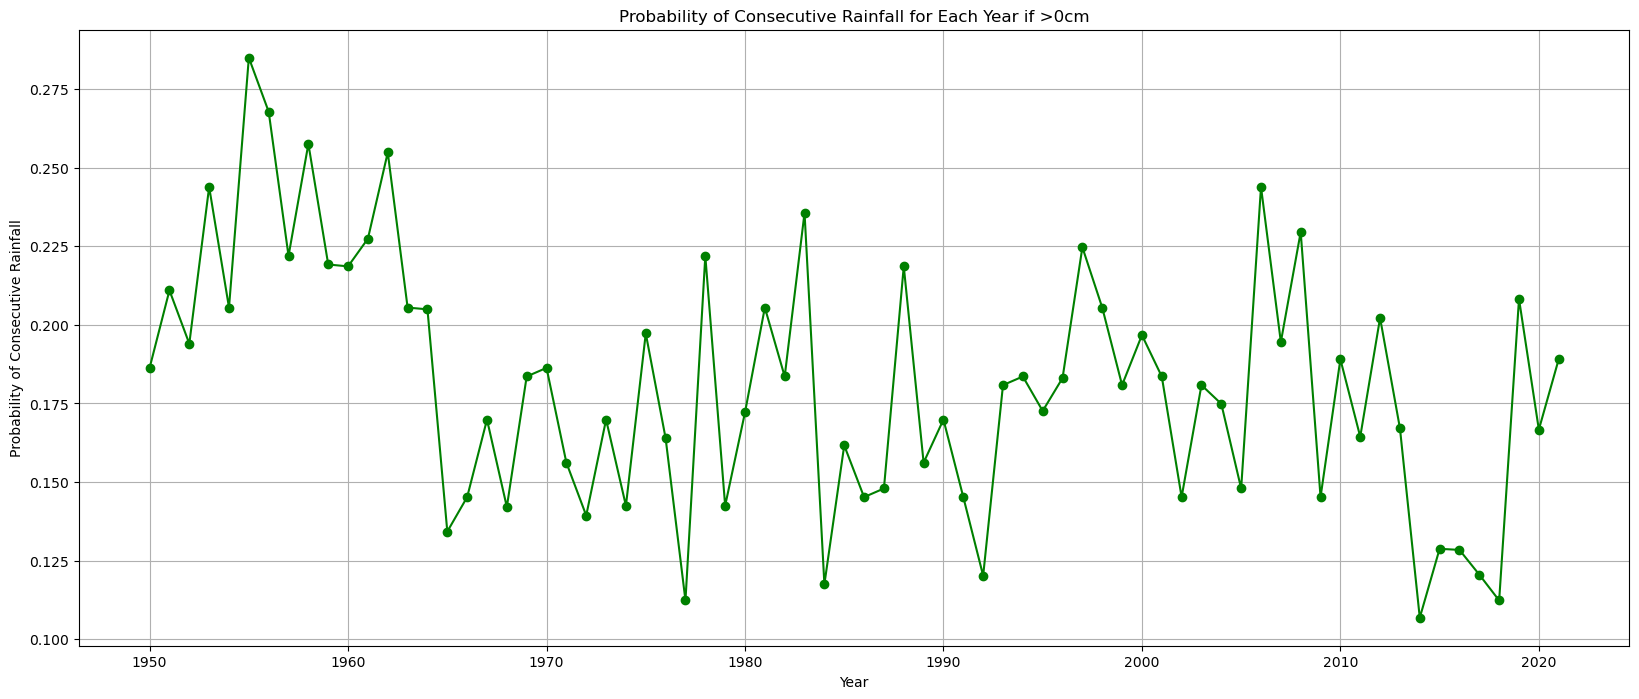

In [57]:
# Create a list to accumulate the results
consecutive_rainfall_prob = []

# Iterate through each year
for year in df['Year'].unique():
    # Filter the data for the current year
    year_data = df[df['Year'] == year]
    
    # Calculate the probability of rainfall for each day
    day_probabilities = year_data['Rainfall'] > 0  #for 0 cm
    
    # Calculate the probability of consecutive rainfall for each day (except the last day)
    consecutive_probabilities = day_probabilities & day_probabilities.shift(-1)
    
    # Calculate the overall probability of consecutive rainfall for the year
    consecutive_rainfall_prob_year = consecutive_probabilities.mean()
    
    # Append the results to the list
    consecutive_rainfall_prob.append({'Year': year, 'Consecutive_Rainfall_Prob': consecutive_rainfall_prob_year})

# Convert the list to a DataFrame
consecutive_rainfall_prob_df = pd.DataFrame(consecutive_rainfall_prob)

# Print the resulting DataFrame
print(consecutive_rainfall_prob_df)

# Plot the probability of consecutive rainfall for each year
plt.figure(figsize=(20, 8))
plt.plot(consecutive_rainfall_prob_df['Year'], consecutive_rainfall_prob_df['Consecutive_Rainfall_Prob'],color='green', marker='o', linestyle='-')
plt.title('Probability of Consecutive Rainfall for Each Year if >0cm')
plt.xlabel('Year')
plt.ylabel('Probability of Consecutive Rainfall')
plt.grid(True)
plt.show()

    Year  Consecutive_Rainfall_Prob
0   1950                   0.016438
1   1951                   0.013699
2   1952                   0.008197
3   1953                   0.043836
4   1954                   0.027397
..   ...                        ...
67  2017                   0.008219
68  2018                   0.005479
69  2019                   0.021918
70  2020                   0.043716
71  2021                   0.038356

[72 rows x 2 columns]


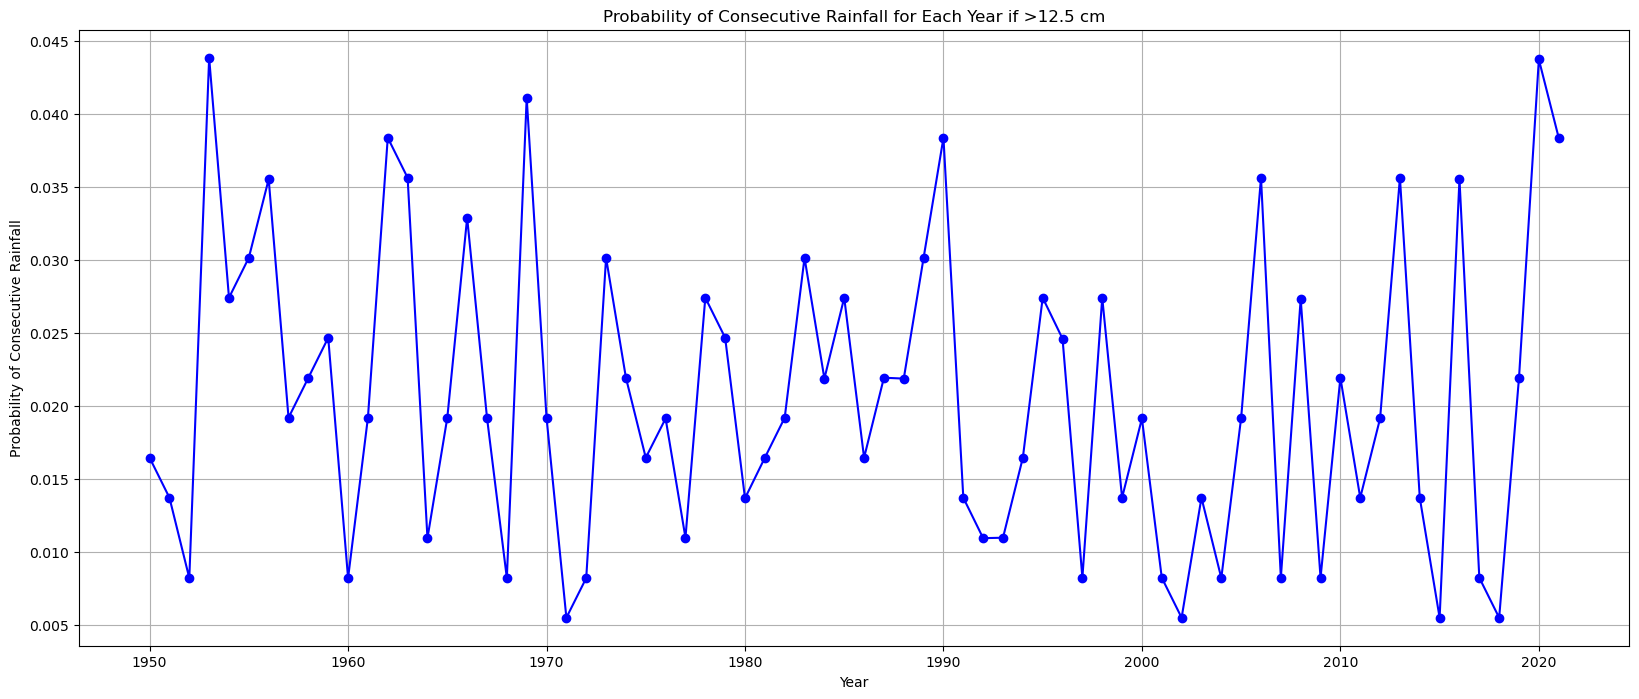

In [56]:
# Create a list to accumulate the results
consecutive_rainfall_prob = []

# Iterate through each year
for year in df['Year'].unique():
    # Filter the data for the current year
    year_data = df[df['Year'] == year]
    
    # Calculate the probability of rainfall for each day
    day_probabilities = year_data['Rainfall'] > 12.5 #for > 12.5cm
    
    # Calculate the probability of consecutive rainfall for each day (except the last day)
    consecutive_probabilities = day_probabilities & day_probabilities.shift(-1)
    
    # Calculate the overall probability of consecutive rainfall for the year
    consecutive_rainfall_prob_year = consecutive_probabilities.mean()
    
    # Append the results to the list
    consecutive_rainfall_prob.append({'Year': year, 'Consecutive_Rainfall_Prob': consecutive_rainfall_prob_year})

# Convert the list to a DataFrame
consecutive_rainfall_prob_df = pd.DataFrame(consecutive_rainfall_prob)

# Print the resulting DataFrame
print(consecutive_rainfall_prob_df)

# Plot the probability of consecutive rainfall for each year
plt.figure(figsize=(20, 8))
plt.plot(consecutive_rainfall_prob_df['Year'], consecutive_rainfall_prob_df['Consecutive_Rainfall_Prob'],color='blue', marker='o', linestyle='-')
plt.title('Probability of Consecutive Rainfall for Each Year if >12.5 cm')
plt.xlabel('Year')
plt.ylabel('Probability of Consecutive Rainfall')
plt.grid(True)
plt.show()

    Year  Consecutive_Rainfall_Prob
0   1950                   0.002740
1   1951                   0.002740
2   1952                   0.000000
3   1953                   0.013699
4   1954                   0.000000
..   ...                        ...
67  2017                   0.005479
68  2018                   0.000000
69  2019                   0.008219
70  2020                   0.016393
71  2021                   0.005479

[72 rows x 2 columns]


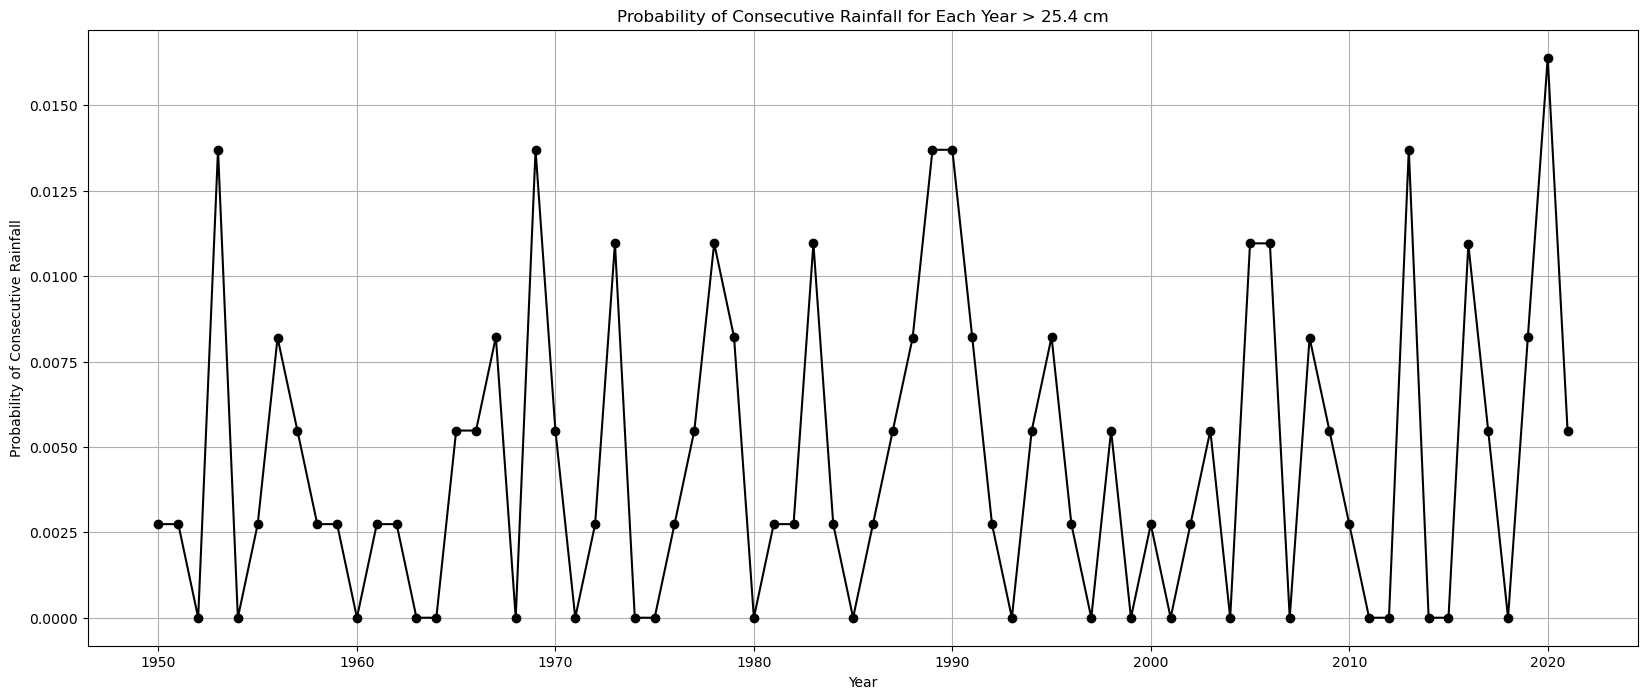

In [55]:
# Create a list to accumulate the results
consecutive_rainfall_prob = []

# Iterate through each year
for year in df['Year'].unique():
    # Filter the data for the current year
    year_data = df[df['Year'] == year]
    
    # Calculate the probability of rainfall for each day
    day_probabilities = year_data['Rainfall'] > 25.4 # for > 25.4cm
    
    # Calculate the probability of consecutive rainfall for each day (except the last day)
    consecutive_probabilities = day_probabilities & day_probabilities.shift(-1)
    
    # Calculate the overall probability of consecutive rainfall for the year
    consecutive_rainfall_prob_year = consecutive_probabilities.mean()
    
    # Append the results to the list
    consecutive_rainfall_prob.append({'Year': year, 'Consecutive_Rainfall_Prob': consecutive_rainfall_prob_year})

# Convert the list to a DataFrame
consecutive_rainfall_prob_df = pd.DataFrame(consecutive_rainfall_prob)

# Print the resulting DataFrame
print(consecutive_rainfall_prob_df)

# Plot the probability of consecutive rainfall for each year
plt.figure(figsize=(20, 8))
plt.plot(consecutive_rainfall_prob_df['Year'], consecutive_rainfall_prob_df['Consecutive_Rainfall_Prob'],color='black', marker='o', linestyle='-')
plt.title('Probability of Consecutive Rainfall for Each Year > 25.4 cm')
plt.xlabel('Year')
plt.ylabel('Probability of Consecutive Rainfall')
plt.grid(True)
plt.show()

In [41]:
# Create a new DataFrame to hold the results
first_rainy_day_prob = pd.DataFrame(columns=['Year', 'First_Rainy_Day', 'Probability'])

# Iterate through each year
for year in df['Year'].unique():
    # Filter the data for the current year
    year_data = df[df['Year'] == year]
    
    # Find the first instance of rain in the year
    first_rainy_day = year_data[year_data['Rainfall'] > 0].head(1) # for 0 cm
    
    # Calculate the probability of the first rainy day
    rainy_probabilities = year_data['Rainfall'] > 0
    first_rainy_day_prob_year = rainy_probabilities.mean()
    
    # Append the results to the DataFrame
    if not first_rainy_day.empty:
        first_rainy_day_date = first_rainy_day['Day'].values[0]
    else:
        first_rainy_day_date = None
    first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)

first_rainy_day_prob

C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\1187989617.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\1187989617.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\1187989617.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'

,Year,First_Rainy_Day,Probability
0,1950.0,21.0,0.257534
1,1951.0,24.0,0.309589
2,1952.0,1.0,0.281421
3,1953.0,3.0,0.309589
4,1954.0,26.0,0.282192
...,...,...,...
67,2017.0,10.0,0.224658
68,2018.0,15.0,0.202740
69,2019.0,26.0,0.306849
70,2020.0,3.0,0.297814


In [42]:
# Create a new DataFrame to hold the results
first_rainy_day_prob = pd.DataFrame(columns=['Year', 'First_Rainy_Day', 'Probability'])

# Iterate through each year
for year in df['Year'].unique():
    # Filter the data for the current year
    year_data = df[df['Year'] == year]
    
    # Find the first instance of rain in the year
    first_rainy_day = year_data[year_data['Rainfall'] > 12.5].head(1) #for 12.5 cm
    
    # Calculate the probability of the first rainy day
    rainy_probabilities = year_data['Rainfall'] > 0
    first_rainy_day_prob_year = rainy_probabilities.mean()
    
    # Append the results to the DataFrame
    if not first_rainy_day.empty:
        first_rainy_day_date = first_rainy_day['Day'].values[0]
    else:
        first_rainy_day_date = None
    first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)

first_rainy_day_prob

C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\476567932.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\476567932.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\476567932.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Yea

C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\476567932.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\476567932.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\476567932.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Yea

,Year,First_Rainy_Day,Probability
0,1950.0,21.0,0.257534
1,1951.0,26.0,0.309589
2,1952.0,22.0,0.281421
3,1953.0,19.0,0.309589
4,1954.0,5.0,0.282192
...,...,...,...
67,2017.0,7.0,0.224658
68,2018.0,23.0,0.202740
69,2019.0,27.0,0.306849
70,2020.0,9.0,0.297814


In [43]:
# Create a new DataFrame to hold the results
first_rainy_day_prob = pd.DataFrame(columns=['Year', 'First_Rainy_Day', 'Probability'])

# Iterate through each year
for year in df['Year'].unique():
    # Filter the data for the current year
    year_data = df[df['Year'] == year]
    
    # Find the first instance of rain in the year
    first_rainy_day = year_data[year_data['Rainfall'] > 25].head(1) # for 25 cm
    
    # Calculate the probability of the first rainy day
    rainy_probabilities = year_data['Rainfall'] > 0
    first_rainy_day_prob_year = rainy_probabilities.mean()
    
    # Append the results to the DataFrame
    if not first_rainy_day.empty:
        first_rainy_day_date = first_rainy_day['Day'].values[0]
    else:
        first_rainy_day_date = None
    first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)

first_rainy_day_prob

C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\1227024281.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\1227024281.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'Year': year, 'First_Rainy_Day': first_rainy_day_date, 'Probability': first_rainy_day_prob_year}, ignore_index=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_21176\1227024281.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  first_rainy_day_prob = first_rainy_day_prob.append({'

,Year,First_Rainy_Day,Probability
0,1950.0,28.0,0.257534
1,1951.0,21.0,0.309589
2,1952.0,18.0,0.281421
3,1953.0,19.0,0.309589
4,1954.0,17.0,0.282192
...,...,...,...
67,2017.0,7.0,0.224658
68,2018.0,23.0,0.202740
69,2019.0,27.0,0.306849
70,2020.0,12.0,0.297814


In [47]:
# Calculate the probability of rainfall for each day
total_occurrences = df['Day'].value_counts().sort_index()
rainy_occurrences = df[df['Rainfall'] > 0]['Day'].value_counts().sort_index()  #for 0 cm
probabilities = rainy_occurrences / total_occurrences

# Find the most probable rainfall day
most_probable_rainfall_day = probabilities.idxmax()

# Print the day and its associated probability
print(f"The most probable rainfall day is Day: {most_probable_rainfall_day}")
print(f"Probability of Rainfall on this day: {probabilities[most_probable_rainfall_day]:.2f}")

The most probable rainfall day is Day: 21
Probability of Rainfall on this day: 0.29


In [48]:
# Calculate the probability of rainfall for each day
total_occurrences = df['Day'].value_counts().sort_index()
rainy_occurrences = df[df['Rainfall'] > 12.5]['Day'].value_counts().sort_index()  #for 12.5 cm
probabilities = rainy_occurrences / total_occurrences

# Find the most probable rainfall day
most_probable_rainfall_day = probabilities.idxmax()

# Print the day and its associated probability
print(f"The most probable rainfall day is Day: {most_probable_rainfall_day}")
print(f"Probability of Rainfall on this day: {probabilities[most_probable_rainfall_day]:.2f}")

The most probable rainfall day is Day: 21
Probability of Rainfall on this day: 0.08


In [49]:
# Calculate the probability of rainfall for each day
total_occurrences = df['Day'].value_counts().sort_index()
rainy_occurrences = df[df['Rainfall'] > 25]['Day'].value_counts().sort_index()  #for 25 cm
probabilities = rainy_occurrences / total_occurrences

# Find the most probable rainfall day
most_probable_rainfall_day = probabilities.idxmax()

# Print the day and its associated probability
print(f"The most probable rainfall day is Day: {most_probable_rainfall_day}")
print(f"Probability of Rainfall on this day: {probabilities[most_probable_rainfall_day]:.2f}")

The most probable rainfall day is Day: 20
Probability of Rainfall on this day: 0.03
